# Multiple Linear Regression

In [ ]:
"""Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1)Which variables are significant in predicting the price of a car
2)How well those variables describe the price of a car"""

# Importing Packages

In [9]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
import warnings

#  Reading and Understanding the Data

In [11]:
df= pd.read_csv("../car-price-prediction/CarPrice_Assignment.csv")

In [12]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Understanding the dataframe

In [13]:
df.shape

(205, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [15]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
df.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [17]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Cleaning the data

In [18]:
df=df.drop("car_ID",axis=1)

In [ ]:
#Some proce ranges are above 36000 which can be termed as outliers. We are not removing the outliers. We will use standarization scaling. 

In [20]:
# Extracting Car Company from the CarName as per direction in Problem 
df["CarName"] = df['CarName'].str.split(' ',expand=True)

In [21]:
# Unique car company
df["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
"""Typo Error in Car Company name

1)maxda = mazda
2)Nissan = nissan
3)porsche = porcshce
4)toyota = toyouta
5)vokswagen = volkswagen = vw"""

In [13]:
# Renaming the typo errors in Car Company names
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [14]:
# changing the datatype of symboling as it is categorical variable
df["symboling"]=df["symboling"].astype(str)

In [22]:
# checking for duplicates
df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [23]:
# Separating Numerical and Categorical Variables/Columns
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.000
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.000
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.000
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.000
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.000
5,2,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250.000
6,1,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710.000
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920.000
8,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875.000
9,0,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,17859.167


# Visualizing the data

In [ ]:
# Here we will identify if some predictors directly have a strong association with the outcome variable price

Text(0, 0.5, 'counts')

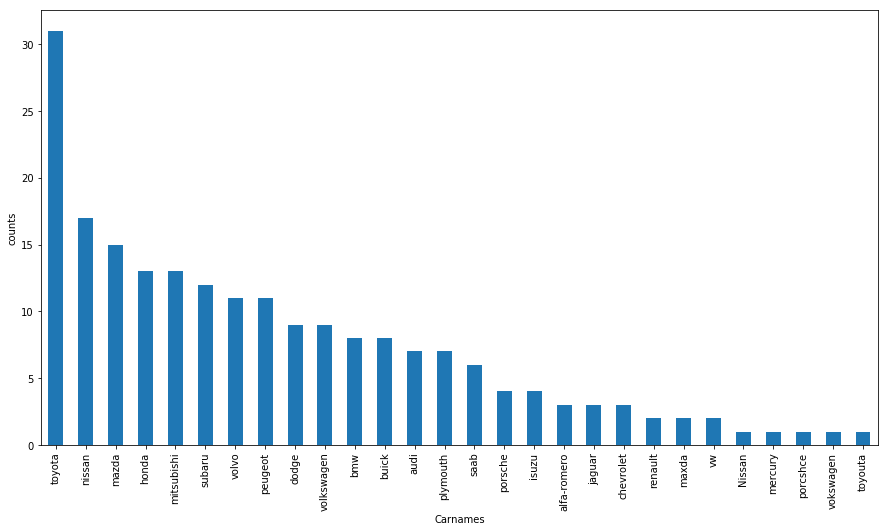

In [25]:
# Visualizing the different car names available
plt.rcParams['figure.figsize'] = [15,8]
ax=df['CarName'].value_counts().plot(kind='bar')
plt.xlabel("Carnames")
plt.ylabel("counts")

In [ ]:
"""By seeing this above graph
1)Toyota seems to be the most favoured cars.
2)Mercury seems to be the least favoured cars."""

In [26]:
#Visualizing the distribution of car prices

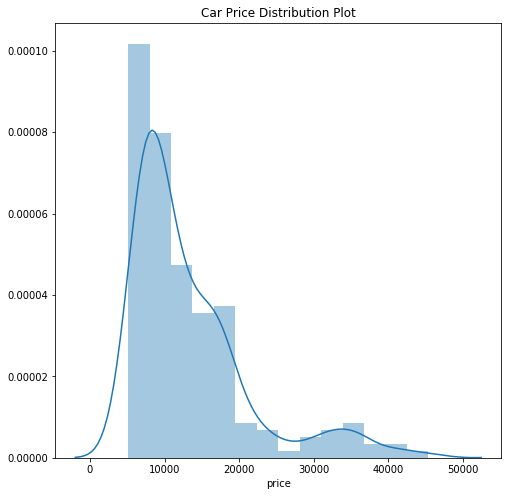

In [31]:
plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

In [ ]:
#The plots seems to be right skewed, the prices of almost all cars looks like less than 18000.

In [ ]:
#Visualising Numeric Variables
#Pairplot of all the numeric variables

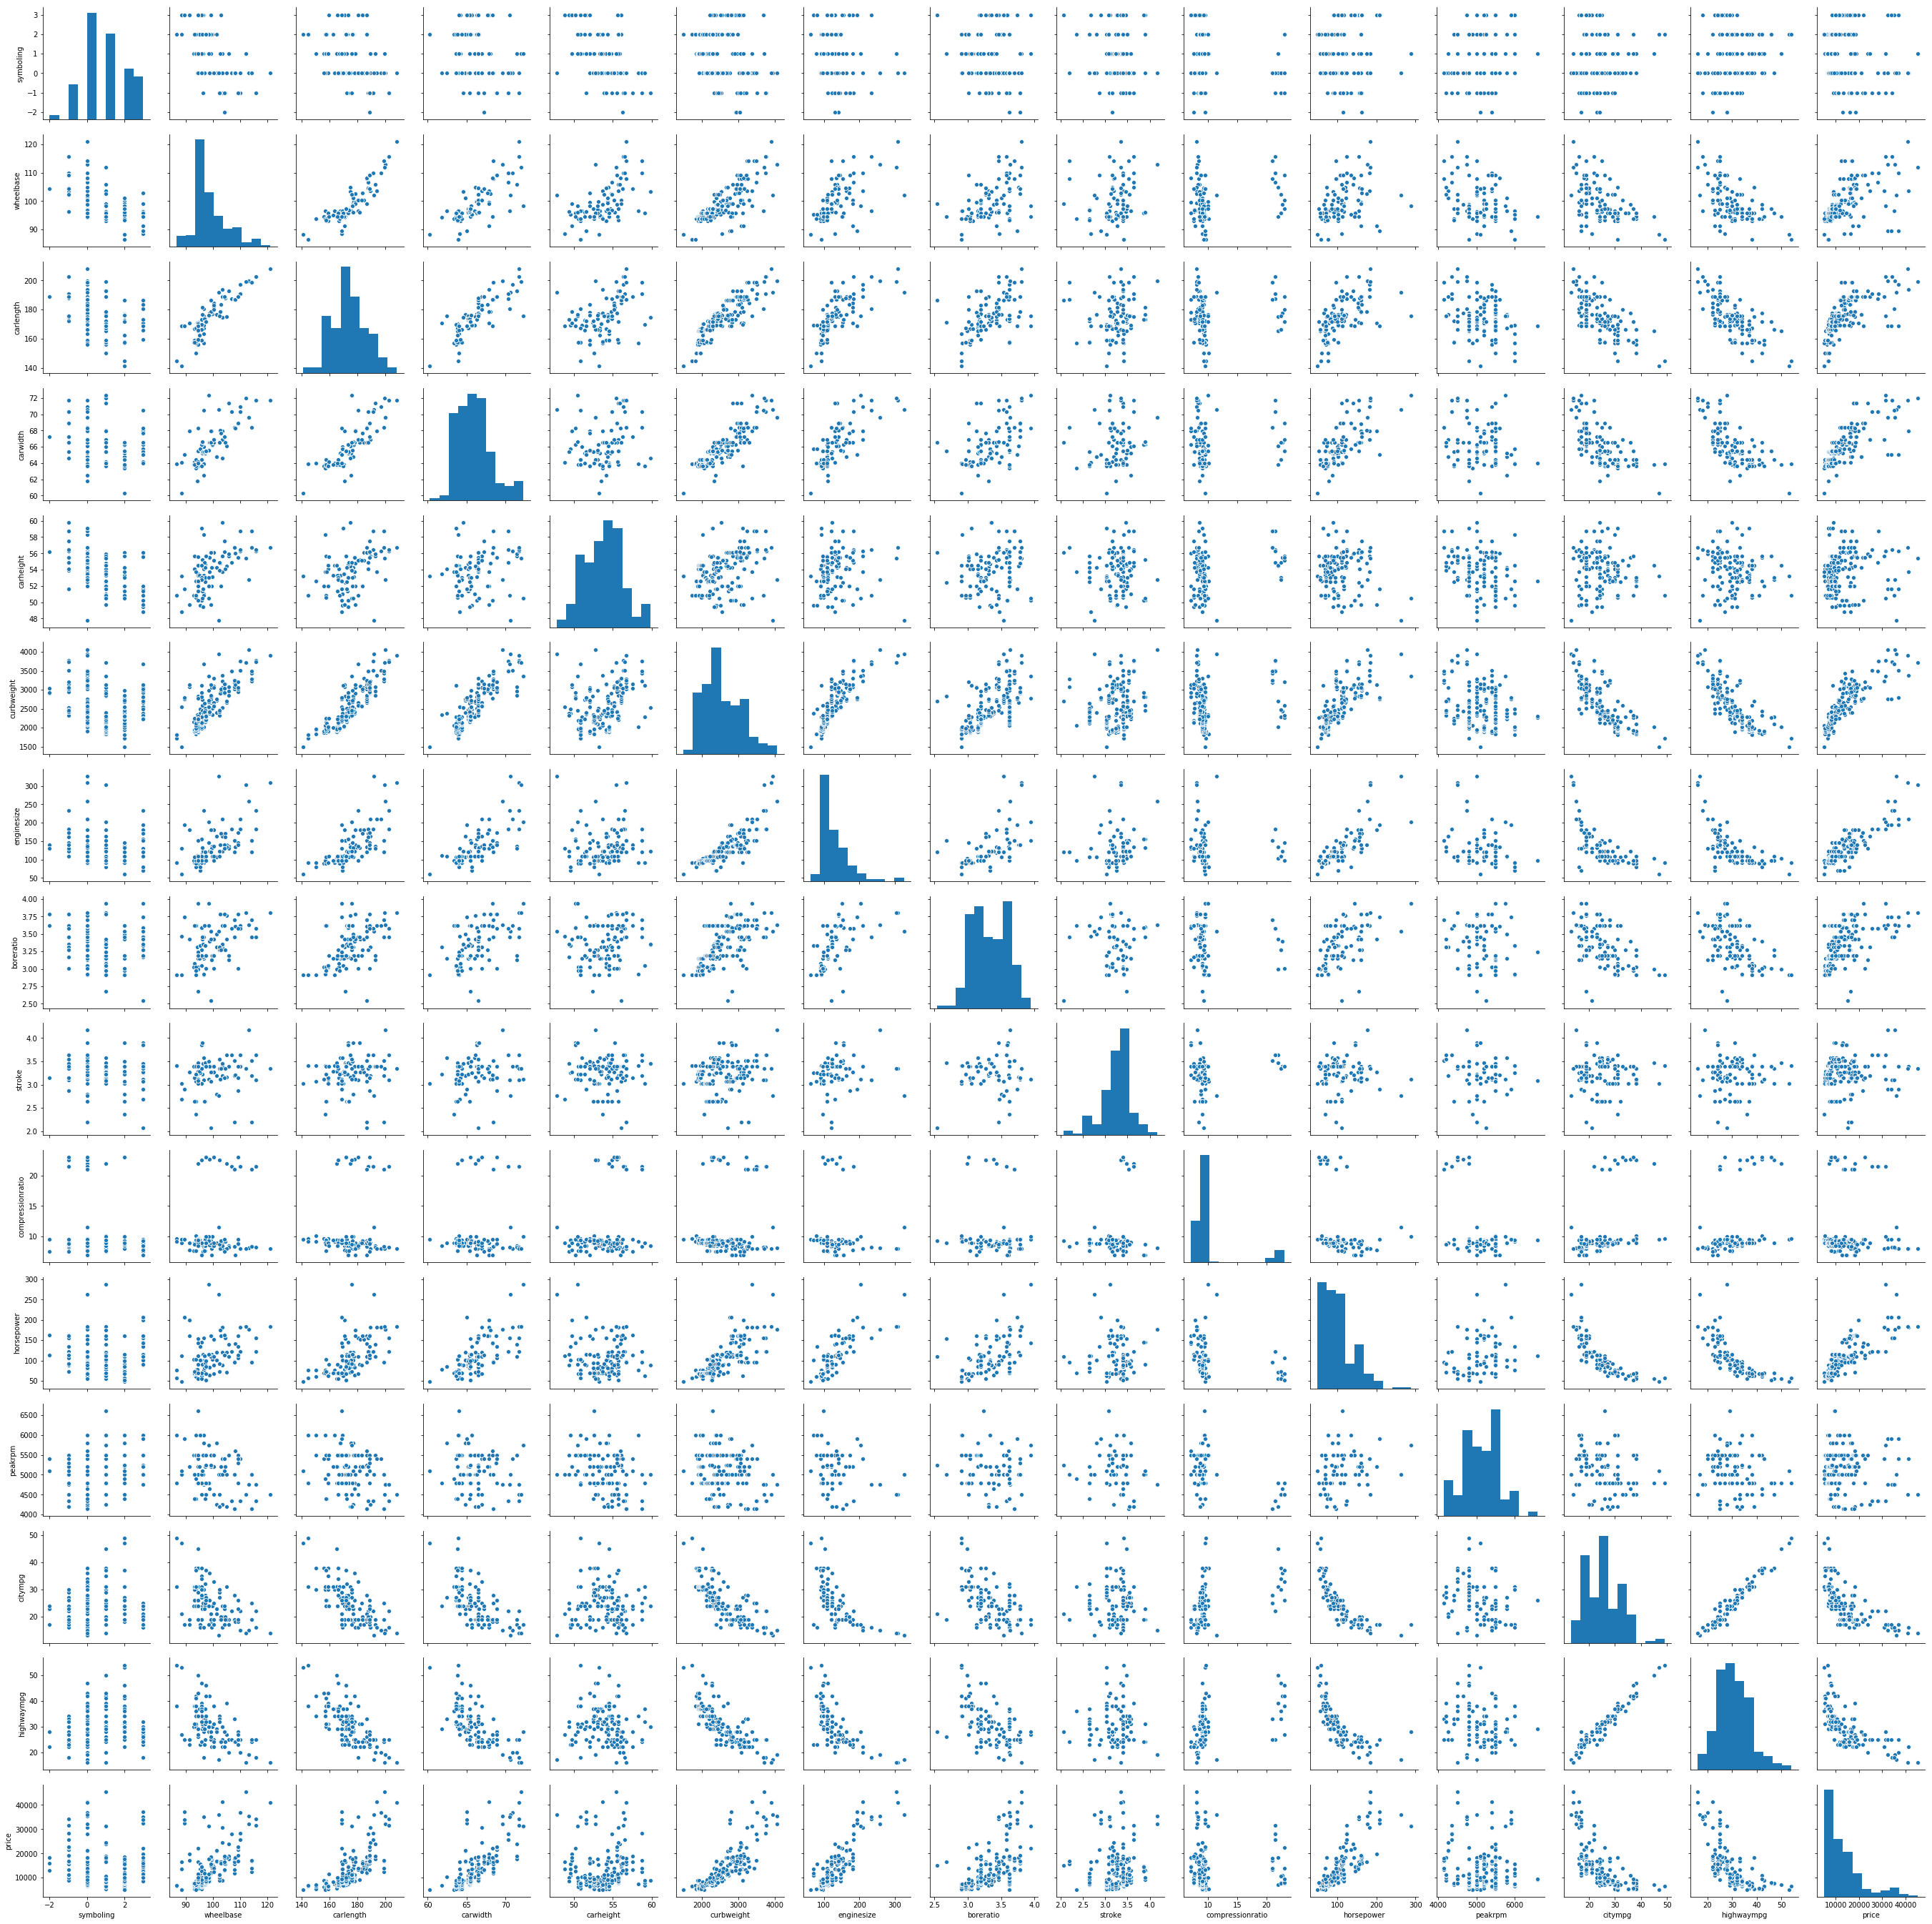

In [32]:
ax = sns.pairplot(df[num_col])

In [ ]:
"""By the above graph,
1)carwidth , carlength, curbweight ,enginesize ,horsepowerseems to have a positive correlation with price.
2)carheight doesnot show any significant trend with price.
3)citympg , highwaympg - seem to have a significant negative correlation with price."""

In [ ]:
#Visualising few more Categorical Variables
#Boxplot of all the categorical variable

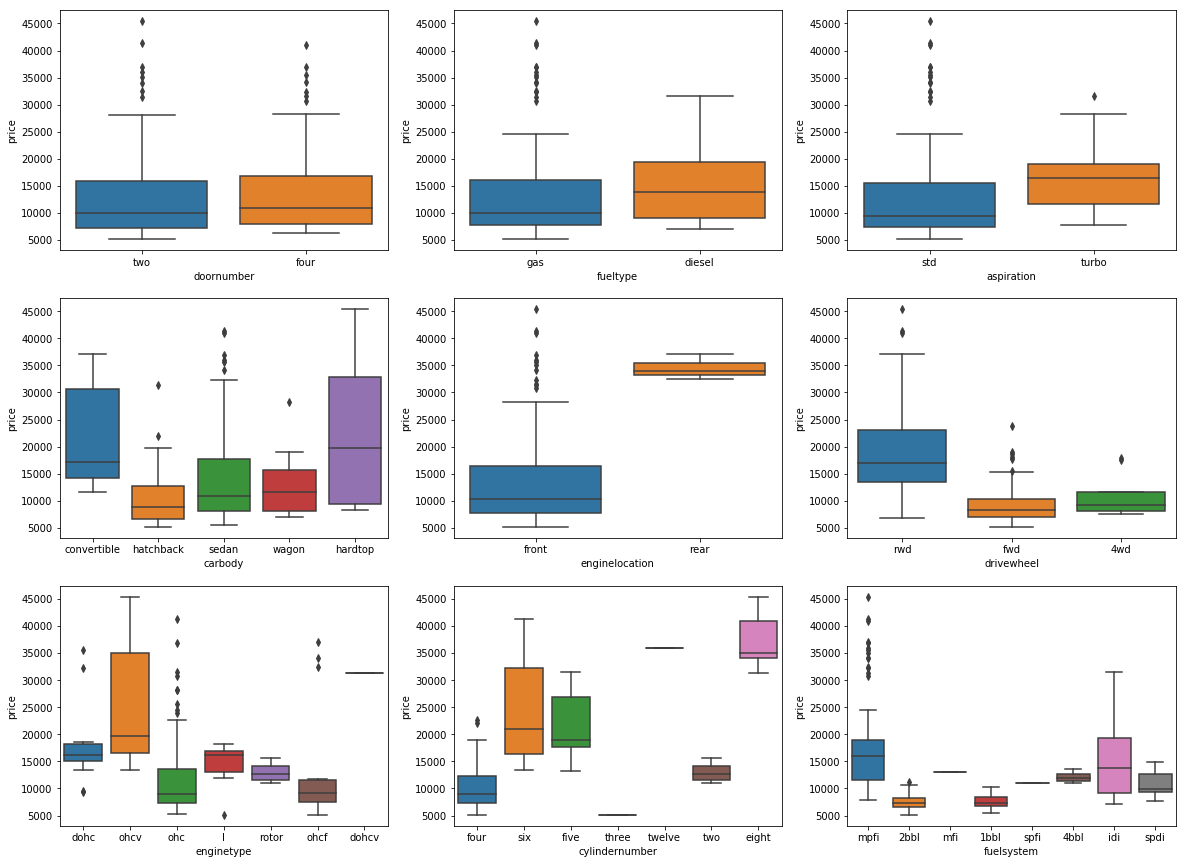

In [33]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

In [ ]:
"""By the above graph,
1)The cars with fueltype as diesel are comparatively expensive than the cars with fueltype as gas.
2)All the types of carbody is relatively cheaper as compared to convertible carbody.
3)The cars with rear enginelocation are way expensive than cars with front enginelocation.
4)The price of car is directly proportional to no. of cylinders in most cases.
5)Enginetype ohcv comes into higher price range cars.
6)DoorNumber isn't affecting the price much.
7)HigerEnd cars seems to have rwd drivewheel"""

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

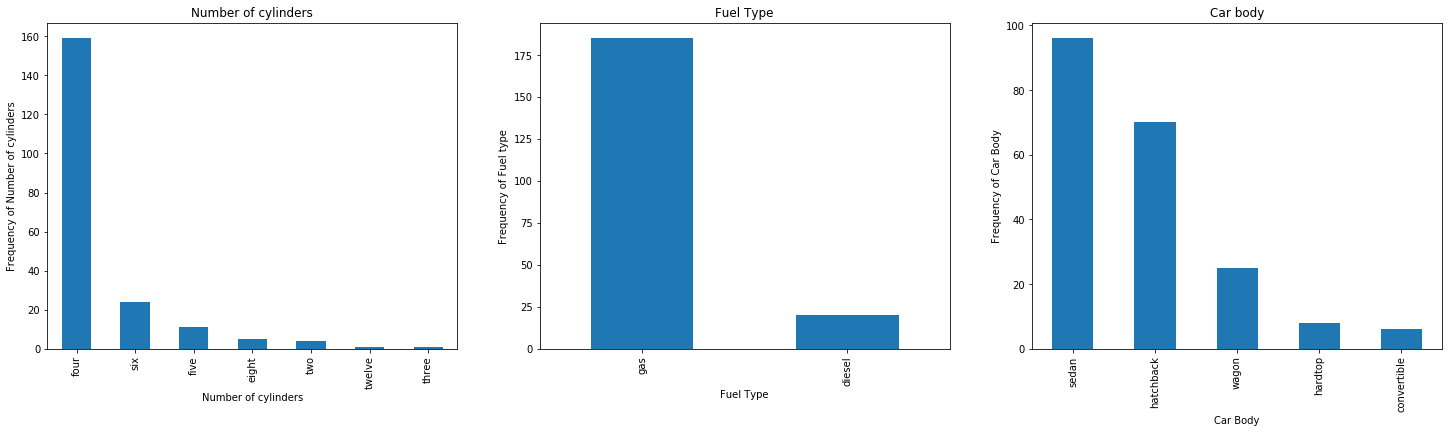

In [34]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot('bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

In [ ]:
"""By the above graph,
1)The number of cylinders used in most cars is four.
2)Number of Gas fueled cars are way more than diesel fueled cars.
3)Sedan is the most prefered car type."""

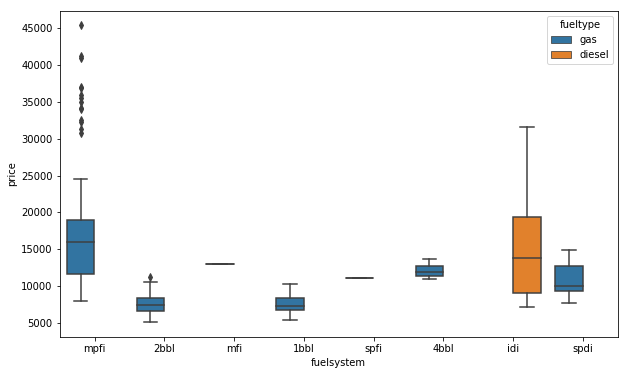

In [36]:
#Relationship between cylindernumber vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

In [ ]:
#Relationship between carbody vs price with hue enginelocation

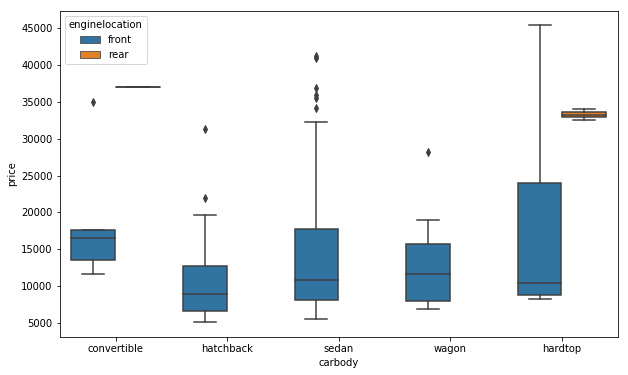

In [37]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

In [ ]:
#Relationship between cylindernumber vs price with hue fueltype

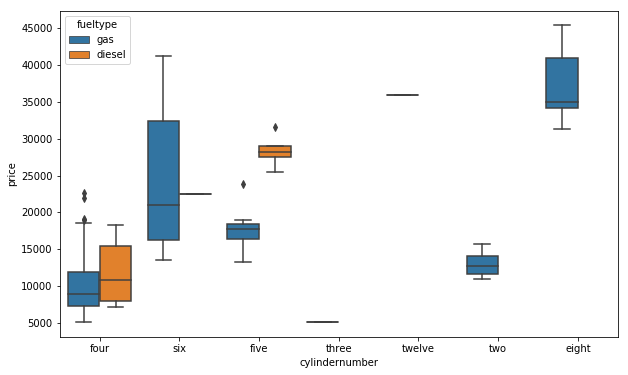

In [38]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

In [ ]:
#Derived Metrices
#1)Average Price

<Figure size 1440x432 with 0 Axes>

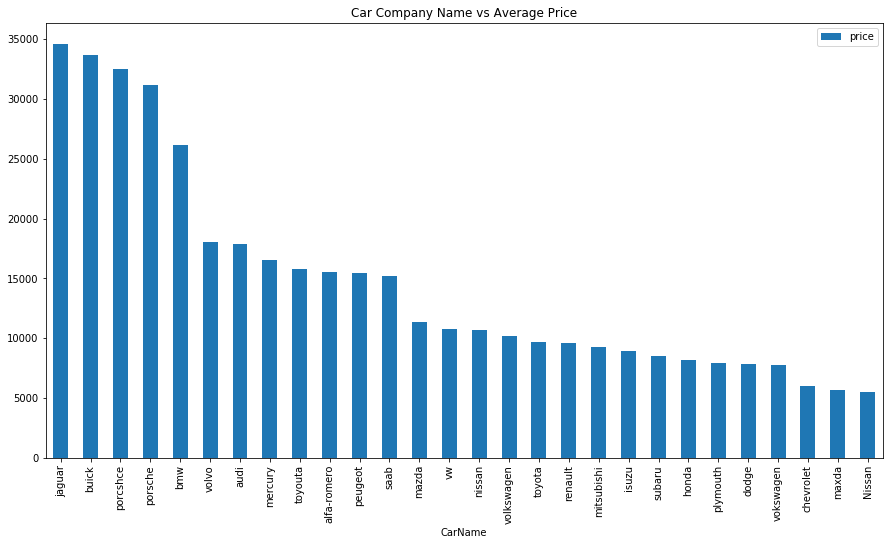

In [39]:
plt.figure(figsize=(20, 6))
df_x = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df_x.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
#As per the above graph, Jaguar,Buick and porsche seems to have the highest average price.

<Figure size 1440x432 with 0 Axes>

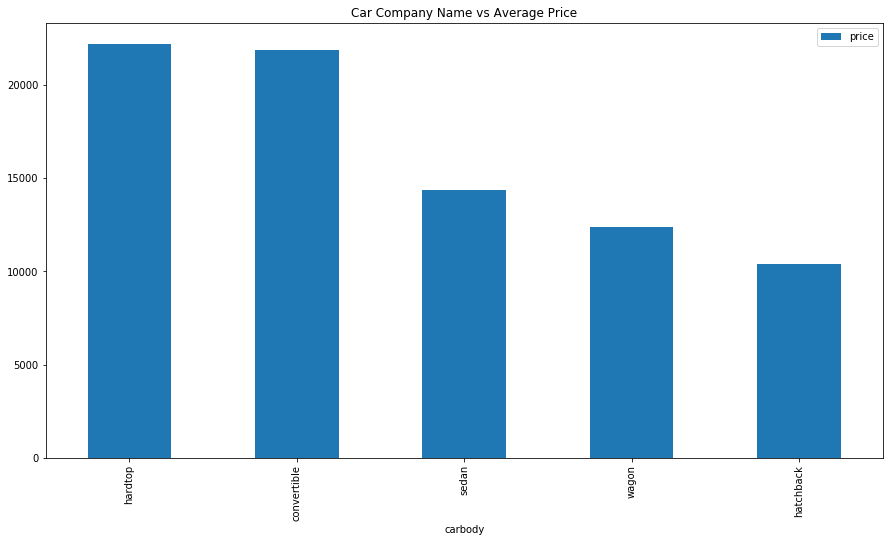

In [41]:
plt.figure(figsize=(20, 6))
df_y = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df_y.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
#As per the graph, hardtop and convertible seems to have the highest average price

In [42]:
#Binning the Car Companies based on avg prices of each car Company.

df['price'] = df['price'].astype('int')
df_temp = df.copy()
t = df_temp.groupby(['CarName'])['price'].mean()
df_temp = df_temp.merge(t.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
df['Cars_Category'] = pd.cut(df_temp['price_y'],bins,right=False,labels=label)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range


In [ ]:
"""Significant variables after Visualization
1)Cars_Category , Engine Type, Fuel Type
2)Car Body , Aspiration , Cylinder Number
3)Drivewheel , Curbweight , Car Length
4)Car Length , Car width , Engine Size
5)Boreratio , Horse Power , Wheel base
6)citympg , highwaympg , symboling"""

In [43]:
sig_col=['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [44]:
df=df[sig_col]

# Data preparation

In [ ]:
#Dummy Variables
#The variable carbody has five levels. We need to convert these levels into integer. Similarly we need to convert the categorical variables to numeric. So,here we are using dummy variables.

In [45]:
sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [46]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'dummies'
dummies = pd.get_dummies(df[sig_cat_col])
dummies.shape


(205, 29)

In [47]:
dummies = pd.get_dummies(df[sig_cat_col], drop_first = True)
dummies.shape

(205, 22)

In [48]:
#Add the results in original dataframe
df = pd.concat([df,dummies], axis=1)

In [49]:
# Drop the original cat variables as dummies are already created
df.drop(sig_cat_col, axis=1, inplace=True)
df.shape

(205, 32)

# Splitting the Data into Training and Testing Sets

In [50]:
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,16500,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,13950,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,17450,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0


In [51]:
#Here, we are doing the basic step or regression i.e: train-test split.
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3,random_state= 100)

In [40]:
df_train.head() 

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
122,7609.0,93.7,2191,98,2.97,68,31,38,167.3,63.8,...,0,0,1,0,0,0,1,0,0,0
125,22018.0,94.5,2778,151,3.94,143,19,27,168.9,68.3,...,0,0,0,1,0,0,1,0,0,0
166,9538.0,94.5,2300,98,3.24,112,26,29,168.7,64.0,...,0,0,0,1,0,0,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,0
199,18950.0,104.3,3157,130,3.62,162,17,22,188.8,67.2,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
"""Rescaling the features
For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. There are two common ways of rescaling:

1)Min-Max scaling
2)Standardisation (mean-0, sigma-1)
Here, we will use Standardisation Scaling"""

In [52]:
scaler = preprocessing.StandardScaler()

In [53]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [54]:
# Apply scaler() to all the columns except the 'dummy' variables
warnings.filterwarnings("ignore")
df_train[sig_num_col]=scaler.fit_transform(df_train[sig_num_col])

In [32]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
122,-0.700201,-0.811836,-0.642128,-0.660242,-1.297329,-0.872898,0.839773,1.025419,-0.487238,-0.924500,...,0,0,1,0,0,0,1,0,0,0
125,1.151929,-0.677177,0.439415,0.637806,2.432256,1.021826,-0.957048,-0.557490,-0.359789,1.114978,...,0,0,0,1,0,0,1,0,0,0
166,-0.452248,-0.677177,-0.441296,-0.660242,-0.259197,0.238673,0.091098,-0.269688,-0.375720,-0.833856,...,0,0,0,1,0,0,0,0,0,0
1,0.442646,-1.670284,0.015642,0.123485,0.625138,0.213410,-0.657578,-0.557490,-0.367754,-0.788535,...,0,0,0,1,0,0,0,0,0,0
199,0.757569,0.972390,1.137720,0.123485,1.201877,1.501822,-1.256518,-1.276993,1.225364,0.616439,...,0,0,0,1,0,0,1,0,0,0


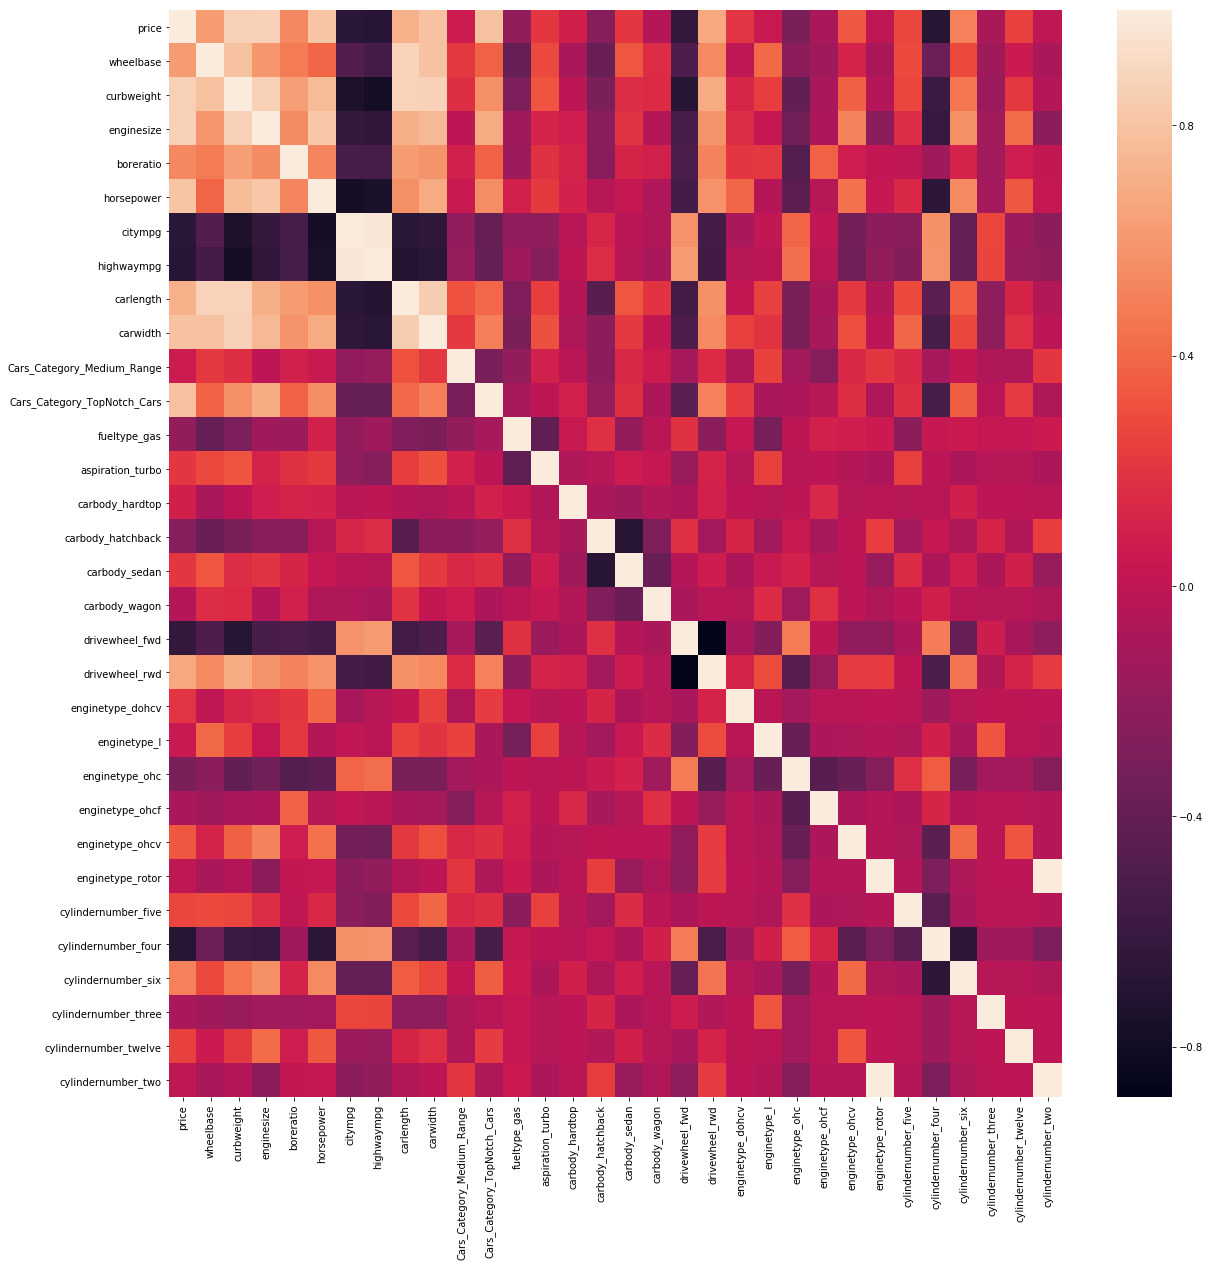

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr())
plt.show()

In [ ]:
#Let's see above plot for few correlated variables vs price

In [57]:
col= ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

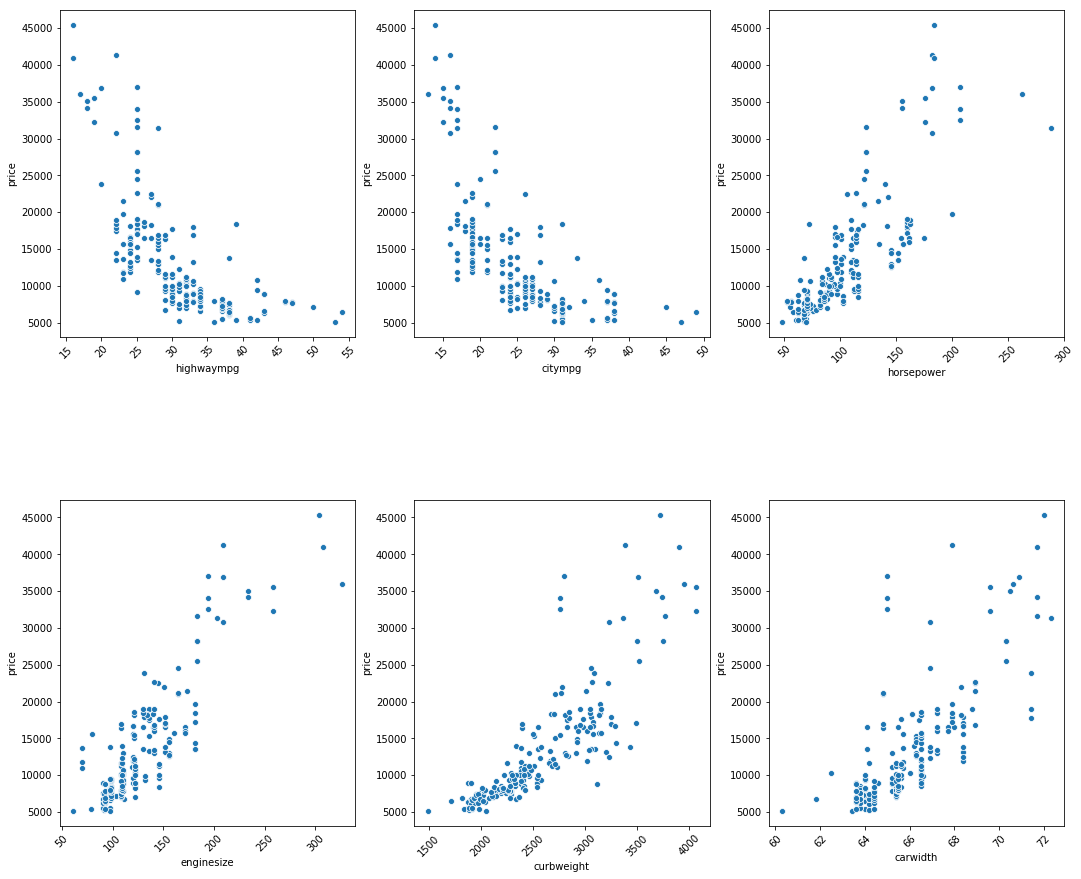

In [58]:
# Scatter Plot of independent variables vs dependent variables
fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col,y='price' ,data=df , ax=axes[x,y])
    #sns.scatterplot(x='citympg',y='price' ,data=df, ax=axes[x,y])
    #sns.scatterplot(x='enginesize',y='price' ,data=df, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

In [ ]:
#We can see there is a line we can fit in above plots

In [59]:
#Dividing into X and Y sets for the model building

In [60]:
y_train= df_train.pop('price')
X_train= df_train

# Building a Linear Model

In [61]:
X_train_1 = X_train['horsepower']

In [62]:
#Add a constant
X_train_1c=sm.add_constant(X_train_1)
# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [63]:
# check parameters created
lr_1.params

const         7.285839e-17
horsepower    8.061819e-01
dtype: float64

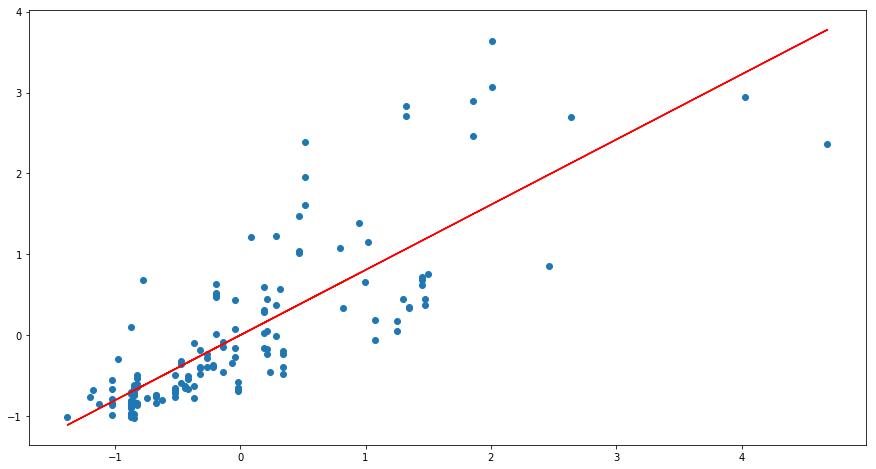

In [64]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [65]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           6.05e-34
Time:                        02:56:26   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.286e-17      0.050   1.46e-15      1.0

In [ ]:
#Adding another variable
#The R-squared value obtained is 0.65. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. curbweight.

In [67]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [68]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)
# create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [69]:
lr_2.params

const         7.285839e-17
horsepower    3.580598e-01
curbweight    5.898214e-01
dtype: float64

In [46]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.34e-49
Time:                        10:59:18   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.527e-16      0.038   4.01e-15      1.0

In [ ]:
#The R-squared increased from 0.650 to 0.797

In [ ]:
#Adding another variable
#The R-squared value obtained is 0.797. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. enginesize.

In [70]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [71]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [72]:
lr_3.params

const         7.285839e-17
horsepower    2.288470e-01
curbweight    3.938203e-01
enginesize    3.400426e-01
dtype: float64

In [73]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           2.16e-51
Time:                        03:01:01   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.286e-17      0.036   2.02e-15      1.0

In [ ]:
#We have achieved a R-squared of 0.819 by manually picking the highly correlated variables. Now lets use RFE to select the independent variables which accurately predicts the dependent variable price.

In [ ]:
#RFE
#Let's use Recursive feature elimination since we have too many independent variables

In [74]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)
rfe= rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 7),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 16),
 ('highwaympg', False, 5),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 2),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 14),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 12),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 17),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 15),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 4),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 3),
 ('cylindernumber_two', False, 10)]

In [76]:
# Selecting the variables which are in support
col_sup = X_train.columns[rfe.support_]
col_sup

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_three'],
      dtype='object')

In [77]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe =X_train[col_sup]

In [ ]:
After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

1)High p-value High VIF : Drop the variable
2)High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
3)Low p-value Low VIF : accept the variable

In [ ]:
# Adding a constant variable and Build a first fitted model

In [78]:
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe =sm.OLS(y_train, X_train_rfec).fit()
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     126.0
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.48e-68
Time:                        03:05:15   Log-Likelihood:                -5.2025
No. Observations:                 143   AIC:                             42.40
Df Residuals:                     127   BIC:                             89.81
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
#Looking at the p-values,it looks like some of the variables aren't really significant (in the presence of other variables)
#and we need to drop it

In [ ]:
"""Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

VIFi=1/(1−Ri^2)"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,enginetype_ohc,11.24
13,cylindernumber_four,10.74
0,curbweight,9.70
6,carbody_sedan,6.41
2,carwidth,5.90
1,horsepower,4.72
5,carbody_hatchback,4.43
7,carbody_wagon,2.88
3,Cars_Category_TopNotch_Cars,2.46
10,enginetype_ohcf,2.35


In [ ]:
#We generally want a VIF that is less than 5. So there are clearly some variables we need to drop

# Dropping the variable and updating the model

In [ ]:
#Dropping cylindernumber_three beacuse its p-value is 0.393 and we want p-value less than 0.05 and hence rebuilding the model

In [81]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe1 = X_train_rfe.drop('cylindernumber_three', 1,)
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()
print(lm_rfe1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.5
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           3.81e-69
Time:                        03:14:18   Log-Likelihood:                -6.4608
No. Observations:                 143   AIC:                             42.92
Df Residuals:                     128   BIC:                             87.36
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_ohc,10.58
13,cylindernumber_four,10.51
0,curbweight,9.68
6,carbody_sedan,5.78
2,carwidth,5.75
1,horsepower,4.64
5,carbody_hatchback,3.92
7,carbody_wagon,2.70
3,Cars_Category_TopNotch_Cars,2.42
10,enginetype_ohcf,2.28


In [ ]:
#Dropping enginetype_ohcv because its p-value is 0.493 and we want p-value less than 0.05 and hence rebuilding the model

In [84]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe2 = X_train_rfe1.drop('enginetype_ohcv', 1,)
# Adding a constant variable and Build a third fitted model
X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     141.2
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.49e-69
Time:                        03:23:18   Log-Likelihood:                -8.2157
No. Observations:                 143   AIC:                             44.43
Df Residuals:                     129   BIC:                             85.91
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,enginetype_ohc,10.38
12,cylindernumber_four,10.37
0,curbweight,9.65
2,carwidth,5.72
6,carbody_sedan,5.18
1,horsepower,4.38
5,carbody_hatchback,3.49
7,carbody_wagon,2.50
3,Cars_Category_TopNotch_Cars,2.41
10,enginetype_ohcf,2.25


In [ ]:
#Dropping carbody_hardtop beacuse its p-value is 0.238 and we want p-value less than 0.05 and hence rebuilding the model

In [87]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     152.5
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           2.18e-70
Time:                        03:27:53   Log-Likelihood:                -8.8988
No. Observations:                 143   AIC:                             43.80
Df Residuals:                     130   BIC:                             82.31
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_four,9.97
8,enginetype_ohc,9.93
0,curbweight,9.63
2,carwidth,5.65
5,carbody_sedan,4.43
1,horsepower,4.09
4,carbody_hatchback,3.00
3,Cars_Category_TopNotch_Cars,2.40
6,carbody_wagon,2.29
9,enginetype_ohcf,2.14


In [ ]:
#Dropping enginetype_ohc beacuse its p-value is 0.110 and we want p-value less than 0.05 and hence rebuilding the model

In [89]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     163.5
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           7.75e-71
Time:                        03:30:12   Log-Likelihood:                -10.600
No. Observations:                 143   AIC:                             45.20
Df Residuals:                     131   BIC:                             80.75
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.46
10,cylindernumber_four,6.59
2,carwidth,5.64
1,horsepower,4.05
5,carbody_sedan,3.96
4,carbody_hatchback,2.82
6,carbody_wagon,2.14
3,Cars_Category_TopNotch_Cars,1.83
9,cylindernumber_five,1.54
7,enginetype_dohcv,1.51


In [ ]:
#Dropping cylindernumber_five beacuse its p-value is 0.104 and we want p-value less than 0.05 and hence rebuilding the model

In [91]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.03e-71
Time:                        03:31:57   Log-Likelihood:                -11.258
No. Observations:                 143   AIC:                             44.52
Df Residuals:                     132   BIC:                             77.11
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.31
9,cylindernumber_four,5.76
2,carwidth,5.08
1,horsepower,3.95
5,carbody_sedan,3.35
4,carbody_hatchback,2.49
6,carbody_wagon,1.95
3,Cars_Category_TopNotch_Cars,1.82
7,enginetype_dohcv,1.50
8,enginetype_ohcf,1.20


In [ ]:
#Dropping enginetype_ohcv beacuse its p-value is 0.180 and we want p-value less than 0.05 and hence rebuilding the model

In [94]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('enginetype_dohcv', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.8
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           8.62e-72
Time:                        03:34:07   Log-Likelihood:                -13.965
No. Observations:                 143   AIC:                             47.93
Df Residuals:                     133   BIC:                             77.56
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,6.90
8,cylindernumber_four,5.66
2,carwidth,4.56
5,carbody_sedan,3.30
1,horsepower,3.15
4,carbody_hatchback,2.48
6,carbody_wagon,1.94
3,Cars_Category_TopNotch_Cars,1.79
7,enginetype_ohcf,1.19


In [ ]:
#Dropping curbweight beacuse its VIF is 8.1 and we want VIF less than 5 and hence rebuilding the model

In [96]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     182.7
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           3.46e-68
Time:                        03:35:42   Log-Likelihood:                -25.773
No. Observations:                 143   AIC:                             69.55
Df Residuals:                     134   BIC:                             96.21
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.65
4,carbody_sedan,3.30
0,horsepower,2.52
3,carbody_hatchback,2.41
1,carwidth,2.26
5,carbody_wagon,1.74
2,Cars_Category_TopNotch_Cars,1.72
6,enginetype_ohcf,1.17


In [ ]:
#Dropping cylindernumber_four beacuse its VIF is 5.66 and we want VIF less than 5 and hence rebuilding the model

In [98]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)
# Adding a constant variable and Build a sixth fitted model
X_train_rfe8c = sm.add_constant(X_train_rfe8)
lm_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     188.6
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           1.88e-66
Time:                        03:37:28   Log-Likelihood:                -32.904
No. Observations:                 143   AIC:                             81.81
Df Residuals:                     135   BIC:                             105.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.30
1,carwidth,2.18
2,Cars_Category_TopNotch_Cars,1.70
4,carbody_sedan,1.27
6,enginetype_ohcf,1.15
5,carbody_wagon,1.11
3,carbody_hatchback,1.08


In [ ]:
#Lets drop carbody_sedan and see if there is any drastic fall in R squared.If not we can drop carbody sedan. Our aim is to explain the maximum variance with minimum variable.

In [100]:
 #Dropping highly correlated variables and insignificant variables

X_train_rfe9 = X_train_rfe8.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe9c = sm.add_constant(X_train_rfe9)
lm_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     206.8
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           8.43e-66
Time:                        03:39:13   Log-Likelihood:                -37.382
No. Observations:                 143   AIC:                             88.76
Df Residuals:                     136   BIC:                             109.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
#The R squared value just dropped by 0.005.Hence we can proceed with dropping carbody_sedan

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.14
1,carwidth,2.12
2,Cars_Category_TopNotch_Cars,1.47
5,enginetype_ohcf,1.11
4,carbody_wagon,1.10
3,carbody_hatchback,1.08


In [ ]:
#Dropping carbody_wagon beacuse its p-value is 0.315 and we want p-value less than 0.05 and hence rebuilding the model

In [102]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe10 = X_train_rfe9.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe10c = sm.add_constant(X_train_rfe10)
lm_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     248.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           7.65e-67
Time:                        03:41:12   Log-Likelihood:                -37.815
No. Observations:                 143   AIC:                             87.63
Df Residuals:                     137   BIC:                             105.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.10
1,carwidth,2.10
2,Cars_Category_TopNotch_Cars,1.47
3,carbody_hatchback,1.08
4,enginetype_ohcf,1.03


In [105]:
#Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model lm_rfe10 and lm_rfe8.
#Here, we are proposing Business 2 Models which can be used to predict the car prices.

In [ ]:
#With lm_rfe10 which has basically 5 predictor variables.

# Residual Analysis of the train data

In [ ]:
#So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [106]:
# Predicting the price of training set
y_train_price = lm_rfe10.predict(X_train_rfe10c)

Text(0.5, 0, 'Errors')

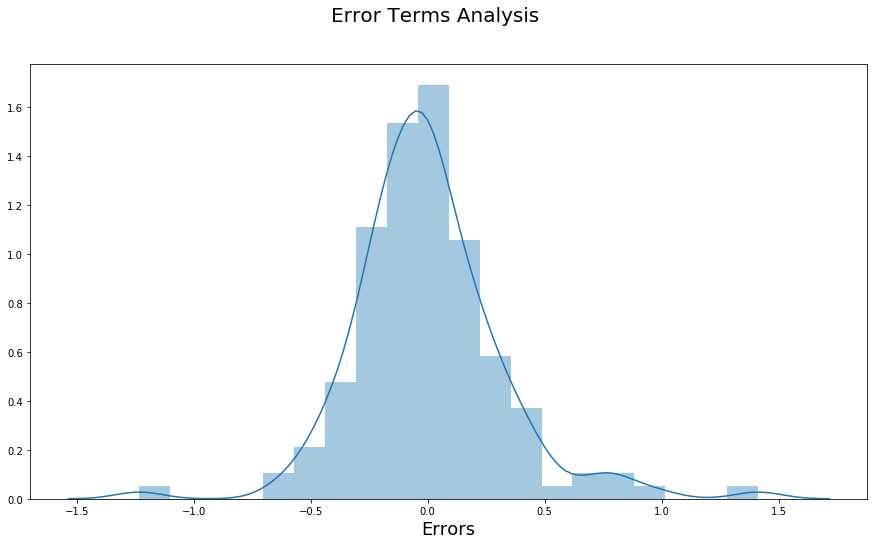

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

# Making Predictions Using the Final Model

In [ ]:
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [ ]:
#Applying the scaling on the test sets

In [108]:

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

In [109]:
#Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [110]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [111]:
# Making predictions using the final model
y_pred = lm_rfe10.predict(X_test_new)


# Model Evaluation
#Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred')

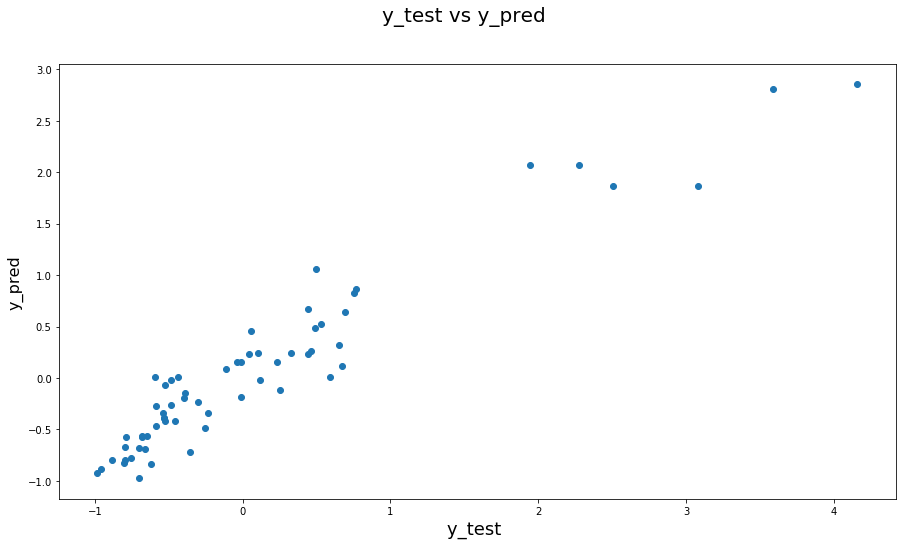

In [112]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16) 

In [114]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.2457785999526319
Mean Squared Error: 0.12549850646409738
Root Mean Squared Error: 0.35425768370509253


In [113]:
r2_score(y_test, y_pred)

0.8915363492374212

# Residual Analysis of the train data

In [115]:
# Predicting the price of training set
y_train_price2 = lm_rfe8.predict(X_train_rfe8c)

Text(0.5, 0, 'Errors')

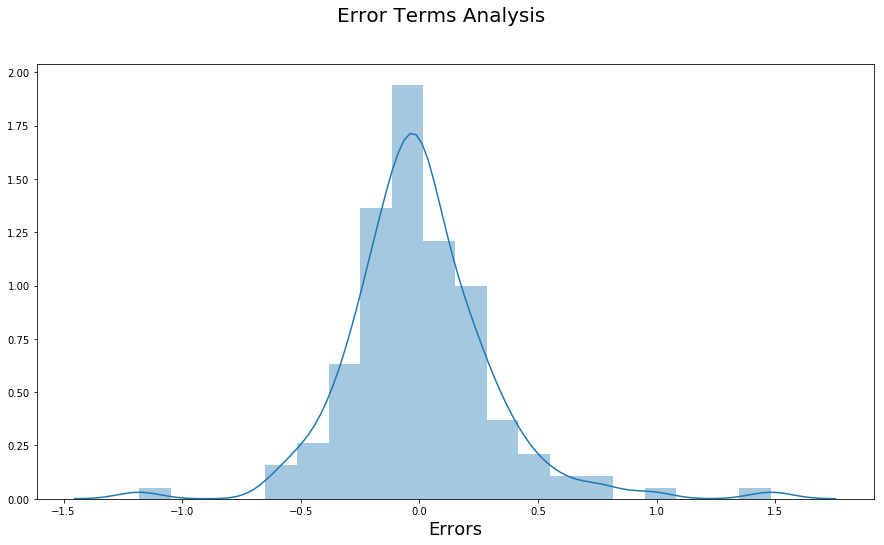

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price2), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)


# Making Predictions Using the Final Model

In [ ]:
#Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model

In [117]:
X_test_2 = X_test_1[X_train_rfe8c.columns]

In [118]:
# Making predictions using the final model
y_pred2 = lm_rfe8.predict(X_test_2)

# Model Evaluation

In [ ]:
#Let's now plot the graph for actual versus predicted values

Text(0, 0.5, 'y_pred2')

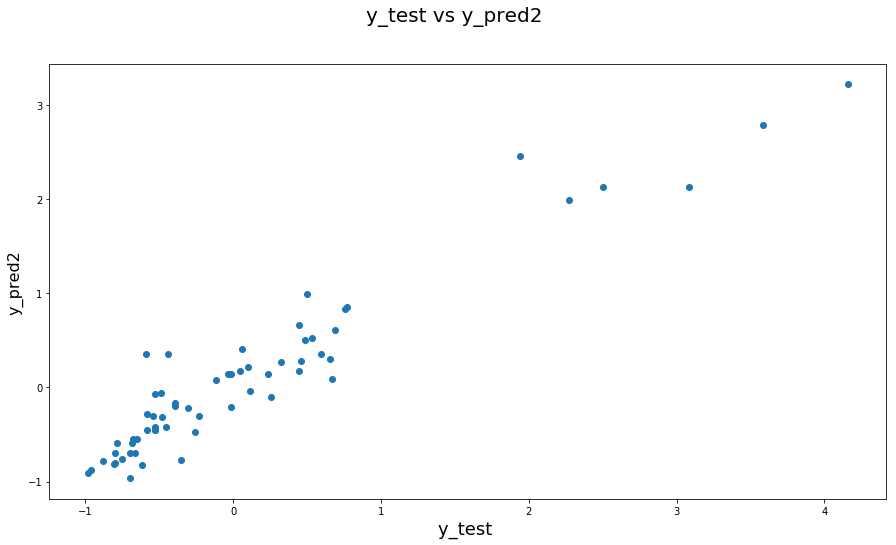

In [119]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred2)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred2', fontsize=16)  

In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))


Mean Absolute Error: 0.23910413117547272
Mean Squared Error: 0.11276471971555882
Root Mean Squared Error: 0.3358045856082951


In [121]:
r2_score(y_test, y_pred2)

0.9025416833859496